# Run BBKNN and Harmony for comparison to scVI and unintegrated

In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import scib

from scib_metrics.benchmark import Benchmarker

%matplotlib inline
sc.logging.print_header()

/home/jovyan/my-conda-envs/standard_scib/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (hasattr(numpy, value)
/home/jovyan/my-conda-envs/standard_scib/lib/python3.8/site-packages/numba/core/ir_utils.py:1526: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  and def_val == getattr(num

scanpy==1.7.1 anndata==0.8.0 umap==0.4.6 numpy==1.20.1 scipy==1.10.1 pandas==1.2.3 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.11.2 louvain==0.7.0 leidenalg==0.8.3


In [2]:
adata = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/scib_benchmarking/pooled_healthy.gene_cellbender.good_qc_cluster_mito80.doublet_flagged.20220909.finalannot_unintegrated.scib20231108.h5ad')

/home/jovyan/my-conda-envs/standard_scib/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
adata

AnnData object with n_obs × n_vars = 1246039 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_s

In [4]:
adata.X.max()

40699.0

In [5]:
adata_int = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/scib_benchmarking/pooled_healthy.gene_cellbender.good_qc_cluster_mito80.stringent_doublet_removed.hvg7500_noCC.scvi_output.lv20_batch256.with_broad_annotation.20220914.finalannot_integrated.scib20231108.h5ad')

/home/jovyan/my-conda-envs/standard_scib/lib/python3.8/site-packages/h5py/_hl/dataset.py:767: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)


In [6]:
adata_int

AnnData object with n_obs × n_vars = 1246039 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_s

In [7]:
adata_int.X.max()

9.205416

In [9]:
adata_hvg = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/models/scvi_output20230126/pooled_healthy.hvg7500_noCC.nodoublets.scvi_output.20230126-ad1.h5ad')

In [10]:
adata

AnnData object with n_obs × n_vars = 1246039 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_s

In [11]:
adata = adata[:, adata.var_names.isin(adata_hvg.var_names)].copy()

In [12]:
sc.tl.pca(adata, n_comps=30, use_highly_variable=False)

In [14]:
adata.obsm["Unintegrated"] = adata.obsm["X_pca"]
adata.obsm["scVI"] = adata_int.obsm["X_scvi"]

%%capture
import scanorama

# List of adata per batch
batch_cats = adata.obs.donorID_unified.cat.categories
adata_list = [adata[adata.obs.donorID_unified == b].copy() for b in batch_cats]
scanorama.integrate_scanpy(adata_list)

adata.obsm["Scanorama"] = np.zeros((adata.shape[0], adata_list[0].obsm["X_scanorama"].shape[1]))
for i, b in enumerate(batch_cats):
    adata.obsm["Scanorama"][adata.obs.donorID_unified == b] = adata_list[i].obsm["X_scanorama"]

In [17]:
bm = Benchmarker(
    adata,
    batch_key="donorID_unified",
    label_key="level_3_annot",
    embedding_obsm_keys=["Unintegrated", "scVI"],
    n_jobs=2,
)

In [ ]:
bm.benchmark()

Computing neighbors:   0%|          | 0/2 [00:00<?, ?it/s]/home/jovyan/my-conda-envs/standard_scib/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (hasattr(numpy, value)
/home/jovyan/my-conda-envs/standard_scib/lib/python3.8/site-packages/numba/core/ir_utils.py:1526: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-note

/home/jovyan/my-conda-envs/standard_scib/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


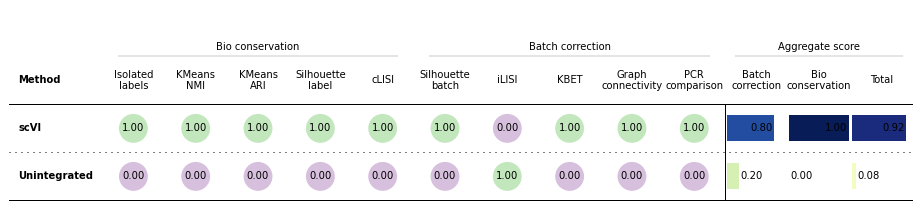

In [21]:
bm.plot_results_table()

/home/jovyan/my-conda-envs/standard_scib/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


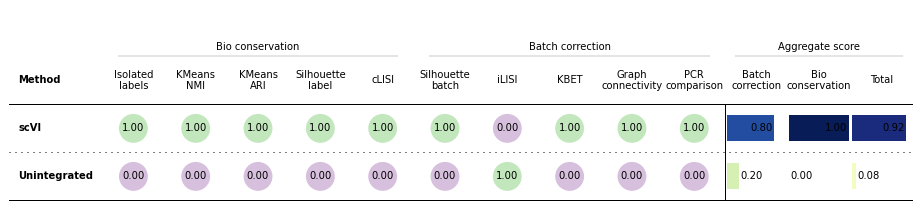

In [23]:
bm.plot_results_table(save_dir='/nfs/team205/ao15/Megagut/Annotations_v3/healthy_analysis/integration_benchmarking/fulladata_results/')

In [24]:
df = bm.get_results()

/home/jovyan/my-conda-envs/standard_scib/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
df

/home/jovyan/my-conda-envs/standard_scib/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Isolated labels,KMeans NMI,KMeans ARI,Silhouette label,cLISI,Silhouette batch,iLISI,KBET,Graph connectivity,PCR comparison,Batch correction,Bio conservation,Total
Embedding,,,,,,,,,,,,,
Unintegrated,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.2,0.0,0.08
scVI,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.8,1.0,0.92
Metric Type,Bio conservation,Bio conservation,Bio conservation,Bio conservation,Bio conservation,Batch correction,Batch correction,Batch correction,Batch correction,Batch correction,Aggregate score,Aggregate score,Aggregate score


In [26]:
df.to_csv('/nfs/team205/ao15/Megagut/Annotations_v3/healthy_analysis/integration_benchmarking/fulladata_results_test.csv')

/home/jovyan/my-conda-envs/standard_scib/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
adata.obsm["Unintegrated"]

array([[-1.8296869e+02, -4.7552639e+01, -3.0361849e+01, ...,
        -2.1392518e-01,  8.5967201e-01,  1.7726762e+00],
       [-1.8284976e+02, -4.3836197e+01, -3.4669106e+01, ...,
        -7.0770556e-01,  1.7622943e-01,  1.1173607e+00],
       [-1.7808093e+02, -4.7589939e+01, -3.1784931e+01, ...,
        -2.3998196e-01,  7.8402376e-01,  1.7849056e+00],
       ...,
       [ 3.0976013e+03, -5.1007089e+02, -3.1482170e+01, ...,
         1.9154730e+01, -9.7197180e+00, -6.4501244e+01],
       [-1.7405104e+02, -3.8841164e+01, -3.5626324e+01, ...,
        -1.0202981e+00,  3.6681551e-01,  1.8988484e+00],
       [ 1.2004879e+03, -2.1749826e+02, -3.3357307e+01, ...,
         4.1140718e+00, -2.1878631e+00, -1.5171031e+01]], dtype=float32)

In [31]:
pd.DataFrame(
    adata.obsm["Unintegrated"],
    index=adata.obs_names,
    columns=[f"LV{i+1}" for i in range(adata.obsm["Unintegrated"].shape[1])],
).to_csv(
    "/nfs/team205/ao15/Megagut/Annotations_v3/healthy_analysis/integration_benchmarking/fulladata_embeddings/unintegrated.csv.gz"
)

In [32]:
unint = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/healthy_analysis/integration_benchmarking/fulladata_embeddings/unintegrated.csv.gz',index_col=0,compression='gzip')

In [33]:
unint

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,LV21,LV22,LV23,LV24,LV25,LV26,LV27,LV28,LV29,LV30
index,,,,,,,,,,,,,,,,,,,,,
AAACGAATCTCTTGCG-GSM4600896,-182.96869,-47.552640,-30.361849,-86.451355,-10.052686,-1.993873,102.965900,-5.622176,-8.244520,-1.752428,...,0.219891,0.998356,0.031920,-0.521571,-1.025180,0.186886,0.355182,-0.213925,0.859672,1.772676
AAACGCTAGCGACCCT-GSM4600896,-182.84976,-43.836197,-34.669106,-89.134865,-8.748613,-1.450106,-59.118107,-9.806281,-9.260619,-0.294029,...,-0.235594,0.638029,-0.348240,-0.884232,-1.446523,0.255065,0.149071,-0.707706,0.176229,1.117361
AAAGAACAGCGACCCT-GSM4600896,-178.08093,-47.589940,-31.784931,-85.421280,-10.074421,-2.157575,21.534353,-6.445819,-8.775234,-1.505281,...,0.224759,-1.546647,0.216562,-0.410538,-0.868397,0.165349,0.366795,-0.239982,0.784024,1.784906
AAAGGGCAGTCACACT-GSM4600896,-183.45810,-43.165226,-34.776646,-96.077580,-8.686465,-1.419293,-61.866380,-10.037341,-8.973084,-2.726282,...,0.180899,9.866103,-0.581228,-1.152101,-1.787535,0.265516,0.164183,-0.721993,0.245110,1.015178
AAAGGGCCAACACAGG-GSM4600896,-185.80653,-49.533900,23.497843,-84.675410,-9.726339,-0.850622,143.965130,-5.149932,-6.887855,-0.716414,...,0.106810,-17.430977,1.668857,0.808121,1.002741,0.184888,1.132438,0.975853,2.939465,9.517002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGAACAACT-GSM5525958,-180.63213,-42.783660,-35.854633,-95.038500,-8.466398,-1.319353,-104.339455,-11.163742,-9.318233,-2.229096,...,0.155279,8.021516,-0.486353,-1.100075,-1.779192,0.300239,0.195493,-0.770612,0.270406,1.287815
TTTGTCAAGATAGGAG-GSM5525958,3630.21580,-17.392937,-8.384179,-24.521210,144.836930,125.224144,-45.472690,-352.359200,220.834320,-1.381596,...,-87.502820,1.039909,-19.364557,36.142980,200.578020,-90.199936,-57.966560,133.235890,-72.997090,-544.119750
TTTGTCAAGTAGGCCA-GSM5525958,3097.60130,-510.070900,-31.482170,-46.851340,-108.642100,-45.739067,-12.626889,38.629784,-23.232670,-1.580424,...,14.320402,6.970740,17.813690,16.617462,37.312330,-16.621407,-5.198505,19.154730,-9.719718,-64.501240


In [34]:
pd.DataFrame(
    adata.obsm["scVI"],
    index=adata.obs_names,
    columns=[f"LV{i+1}" for i in range(adata.obsm["scVI"].shape[1])],
).to_csv(
    "/nfs/team205/ao15/Megagut/Annotations_v3/healthy_analysis/integration_benchmarking/fulladata_embeddings/scVI.csv.gz"
)

/home/jovyan/my-conda-envs/standard_scib/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
scvi_int = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/healthy_analysis/integration_benchmarking/fulladata_embeddings/scVI.csv.gz',index_col=0,compression='gzip')

In [37]:
scvi_int

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,LV11,LV12,LV13,LV14,LV15,LV16,LV17,LV18,LV19,LV20
index,,,,,,,,,,,,,,,,,,,,
AAACGAATCTCTTGCG-GSM4600896,1.485709,0.139740,0.788691,0.006428,-0.449599,0.035644,1.488679,-0.029249,1.661317,0.344493,1.364612,-1.180276,-1.295085,-1.678798,0.005166,-1.269441,0.037849,-0.054872,-0.659535,-0.028524
AAACGCTAGCGACCCT-GSM4600896,-0.876173,-1.174195,-1.999712,0.027764,1.216232,0.004400,-0.010934,-0.067665,1.575182,-0.321202,-0.617129,-2.173305,-0.939770,1.295961,-0.034061,-0.007191,0.029218,0.169127,-1.530224,-0.001530
AAAGAACAGCGACCCT-GSM4600896,0.306341,-1.860595,1.364353,0.020180,0.024140,0.035121,0.173966,-0.010754,1.154424,0.272679,1.233574,-2.182591,-1.335822,-1.670801,0.037005,-1.335630,0.019691,-0.325471,-0.473762,-0.006091
AAAGGGCAGTCACACT-GSM4600896,-1.048534,-0.382853,-1.154650,0.009045,1.320448,-0.001983,0.886629,-0.066898,1.162265,-0.132742,-0.425517,-2.223906,-0.925352,1.518832,-0.028744,-1.296824,0.041518,-0.117163,-1.429552,-0.023197
AAAGGGCCAACACAGG-GSM4600896,0.842679,-0.533378,-1.099758,0.026912,-3.413429,0.043136,1.594899,-0.018520,1.628954,-0.185940,-0.307772,-2.353421,-2.344352,-0.089459,-0.026076,0.845680,0.079013,-0.479581,0.901874,-0.049893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGAACAACT-GSM5525958,-0.134631,0.304733,-0.532001,0.041684,0.434584,0.016585,-1.134118,-0.030293,-0.410410,0.104870,-0.875725,-0.398914,0.064168,-1.226911,0.003204,-0.604403,0.006519,1.623717,0.059375,0.003117
TTTGTCAAGATAGGAG-GSM5525958,0.008160,-0.330196,0.877675,-0.005547,0.201088,0.002853,0.605029,0.014104,0.016672,-0.222256,0.415308,0.039241,0.149066,2.008074,-0.008200,0.597521,-0.007082,0.495704,-0.138744,0.014500
TTTGTCAAGTAGGCCA-GSM5525958,-0.048015,0.165523,0.719267,-0.000136,0.095436,0.020799,0.703053,-0.016079,-0.975337,-0.011967,-0.036739,-0.562427,-0.318935,1.541700,-0.016034,0.436277,0.005260,0.116588,0.035713,-0.011626


In [39]:
adata.X.max()

40699.0

In [40]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [41]:
adata.X.max()

9.207925

In [42]:
import bbknn
bbknn.bbknn(adata, batch_key='donorID_unified',neighbors_within_batch=1)

In [43]:
adata.obsm["BBKNN"] = adata.obsm["X_pca"]

In [44]:
pd.DataFrame(
    adata.obsm["BBKNN"],
    index=adata.obs_names,
    columns=[f"LV{i+1}" for i in range(adata.obsm["BBKNN"].shape[1])],
).to_csv(
    "/nfs/team205/ao15/Megagut/Annotations_v3/healthy_analysis/integration_benchmarking/fulladata_embeddings/BBKNN.csv.gz"
)

In [45]:
BBKNN_int = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/healthy_analysis/integration_benchmarking/fulladata_embeddings/BBKNN.csv.gz',index_col=0,compression='gzip')

In [46]:
BBKNN_int

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,LV41,LV42,LV43,LV44,LV45,LV46,LV47,LV48,LV49,LV50
index,,,,,,,,,,,,,,,,,,,,,
AAACGAATCTCTTGCG-GSM4600896,-182.94220,-47.551740,-30.360666,-86.451940,-10.039281,-1.989791,102.963810,-5.623042,-8.235135,-1.751870,...,-2.057501,-0.212252,0.294500,0.191046,0.361949,0.248070,-0.457380,27.833822,0.979259,0.750801
AAACGCTAGCGACCCT-GSM4600896,-182.84901,-43.836280,-34.668762,-89.133920,-8.750327,-1.448871,-59.114490,-9.806015,-9.256948,-0.294424,...,6.395833,-0.212969,-0.092645,-0.139203,0.062784,-0.600015,-0.419849,11.078780,0.500566,-0.135724
AAAGAACAGCGACCCT-GSM4600896,-178.08408,-47.595284,-31.775137,-85.428200,-10.078421,-2.160448,21.530233,-6.445445,-8.769877,-1.504034,...,-5.867660,-0.174347,0.280014,0.164429,0.369652,0.106506,-0.535201,30.946604,1.228183,0.705879
AAAGGGCAGTCACACT-GSM4600896,-183.45175,-43.164090,-34.776382,-96.076960,-8.688474,-1.422304,-61.869358,-10.037364,-8.971204,-2.726204,...,-6.094750,0.321252,-0.247197,-0.390195,-0.010442,-0.758317,-0.446354,-5.238946,-0.382701,-0.498767
AAAGGGCCAACACAGG-GSM4600896,-185.81075,-49.543170,23.504980,-84.678820,-9.727755,-0.843618,143.959150,-5.147984,-6.873423,-0.715599,...,-28.890413,-1.310646,1.483495,2.235611,1.841686,4.988509,2.167079,45.515297,1.910189,4.246047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGAACAACT-GSM5525958,-180.63184,-42.783820,-35.854490,-95.038140,-8.466352,-1.319478,-104.340610,-11.163938,-9.318690,-2.229145,...,-2.638775,0.091239,-0.182961,-0.268325,0.022268,-0.677519,-0.330272,-4.061317,-0.258109,-0.441218
TTTGTCAAGATAGGAG-GSM5525958,3630.21660,-17.386330,-8.386890,-24.519130,144.839000,125.222540,-45.503056,-352.358430,220.838420,-1.377192,...,-44.027245,134.251630,-56.189426,-81.245380,-45.596650,-31.530771,-65.137130,-1.872351,-47.490242,-16.211000
TTTGTCAAGTAGGCCA-GSM5525958,3097.60380,-510.069920,-31.480484,-46.850304,-108.642090,-45.739460,-12.633891,38.629833,-23.231857,-1.579765,...,-10.573924,15.955255,-9.362339,-12.945180,-5.100390,-17.397880,-15.052512,-0.340684,-5.762441,-9.165508
